# Bsc Computer science with Computer , Sem : 3
# Data Analysis Using Python Programing 
# Name : Rajnish Kumar
# Clg Roll no : APS19036
# Examination Roll no : 19048582069

# Importing important libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

# Reading the data

In [3]:
raw_data = pd.read_csv('covid19.csv')

In [4]:
raw_data.head()

,S. No.,Name Of State,Total Confirmed Cases,Cured,Death
0,0,Andaman and Nicobar,4758,4624,61
1,1,Andhra Pradesh,871972,859029,7033
2,2,Arunachal Pradesh,16395,15605,55
3,3,Assam,213759,209214,993
4,4,Bihar,238106,231248,1295


# Checking  The Outliers if any 

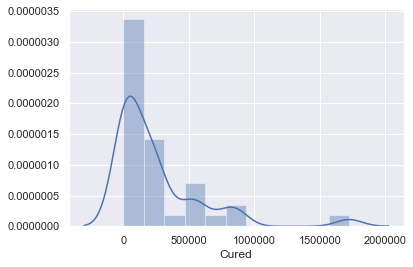

In [5]:
sns.distplot(raw_data['Cured'])

In [7]:
raw_data.Cured.mean()

253886.13888888888

In [9]:
raw_data.Cured.std()

355160.0125791313

In [16]:
upper_limit = raw_data.Cured.mean() + 3*raw_data.Cured.std()
upper_limit

1319366.1766262827

In [17]:
raw_data[(raw_data.Cured>upper_limit)]

,S. No.,Name Of State,Total Confirmed Cases,Cured,Death
19,19,Maharashtra,1852266,1723370,47734


## In the above graphs of "cured" there is outliers on the right hand side
## That is "Maharashtra" is The outlier 

# Creating summary of the above data

## Taking "y" as the Dependent variable  and "x1" as a independent  

In [18]:
y=raw_data['Total Confirmed Cases']
x1=raw_data['Cured']

## Taking "x" as the constant  for the regression line 

In [20]:
x = sm.add_constant(x1)

## Creating a "result" Variable and assigning the OLS values for the summary 

In [21]:
result =sm.OLS(y,x).fit()

In [22]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Total Confirmed Cases   R-squared:                       0.999
Model:                               OLS   Adj. R-squared:                  0.999
Method:                    Least Squares   F-statistic:                 3.792e+04
Date:                   Tue, 08 Dec 2020   Prob (F-statistic):           2.09e-53
Time:                           00:12:17   Log-Likelihood:                -386.46
No. Observations:                     36   AIC:                             776.9
Df Residuals:                         34   BIC:                             780.1
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -335.9567   2354.652     -0.143      0.887   -5121.185    4449.271
Cured          1.0601      0.005    194.739      0.000       1.049       1.071
==============================================================================
Omnibus:                       12.095   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               23.899
Skew:                          -0.606   Prob(JB):                     6.46e-06
Kurtosis:                       6.803   Cond. No.                     5.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Graps here to conclude the whole data 

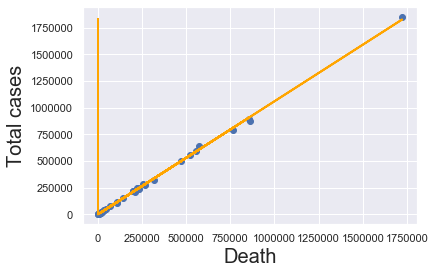

In [25]:
plt.scatter(x1,y)
yhat = 1.0601*x1 + -335.9567
fig = plt.plot(x,yhat, lw=2, c='orange', label ='regression line')
plt.xlabel('Death', fontsize = 20)
plt.ylabel('Total cases', fontsize = 20)
plt.show()

## All Done 